In [1]:
!pip install gdown
import gdown 
# https://drive.google.com/file/d/19hBMGCVMyZutTenSx7XohbxSkBp_AonM/view?usp=sharing
url = 'https://drive.google.com/uc?id=19hBMGCVMyZutTenSx7XohbxSkBp_AonM' 
output = 'age_pred_kaggle.tar'
gdown.download(url, output)
!tar xvf age_pred_kaggle.tar

Downloading...
From: https://drive.google.com/uc?id=19hBMGCVMyZutTenSx7XohbxSkBp_AonM
To: /kaggle/working/age_pred_kaggle.tar
100%|██████████| 90.1M/90.1M [00:00<00:00, 158MB/s]


age_pred_kaggle/
age_pred_kaggle/test_trx.parquet/
age_pred_kaggle/test_trx.parquet/.part-00000-e5985efd-4c49-4238-ab6c-d03a6a439649-c000.snappy.parquet.crc
age_pred_kaggle/test_trx.parquet/part-00000-e5985efd-4c49-4238-ab6c-d03a6a439649-c000.snappy.parquet
age_pred_kaggle/test_trx.parquet/.part-00001-e5985efd-4c49-4238-ab6c-d03a6a439649-c000.snappy.parquet.crc
age_pred_kaggle/test_trx.parquet/part-00001-e5985efd-4c49-4238-ab6c-d03a6a439649-c000.snappy.parquet
age_pred_kaggle/test_trx.parquet/.part-00002-e5985efd-4c49-4238-ab6c-d03a6a439649-c000.snappy.parquet.crc
age_pred_kaggle/test_trx.parquet/part-00002-e5985efd-4c49-4238-ab6c-d03a6a439649-c000.snappy.parquet
age_pred_kaggle/test_trx.parquet/.part-00003-e5985efd-4c49-4238-ab6c-d03a6a439649-c000.snappy.parquet.crc
age_pred_kaggle/test_trx.parquet/part-00003-e5985efd-4c49-4238-ab6c-d03a6a439649-c000.snappy.parquet
age_pred_kaggle/test_trx.parquet/.part-00004-e5985efd-4c49-4238-ab6c-d03a6a439649-c000.snappy.parquet.crc
age_pred_kaggle

# load dependencies

In [2]:
import sys
!pip install pytorch-lifestream

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.4/163.4 kB 1.5 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 63.2 MB/s eta 0:00:00:00:0100:01
  Created wheel for pytorch-lifestream: filename=pytorch_lifestream-0.6.0-py3-none-any.whl size=274604 sha256=ae2d751bf87e6fb67d2225f54a14cd949421c9c192eba0d3f3f38189eeb8adbc
  Stored in directory: /root/.cache/pip/wheels/90/76/b4/0a944bc7c5a69201e4d757cc54886971117a2a581740e7f11d
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.

In [3]:
!pip install pytorch-lightning==1.8.5
!pip install torchvision==0.12.0
!pip install duckdb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.4/800.4 kB 5.1 MB/s eta 0:00:00a 0:00:01m
  Attempting uninstall: pytorch-lightning
    Found existing installation: pytorch-lightning 2.2.1
    Uninstalling pytorch-lightning-2.2.1:
      Successfully uninstalled pytorch-lightning-2.2.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 64.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.6/750.6 MB 2.1 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: torch
    Found existing installation: torch 2.1.2
    Uninstalling torch-2.1.2:
      Successfully uninstalled torch-2.1.2
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.16.2
    Uninstalling torchvision-0.16.2:
      Successfully uninstalled torchvision-0.16.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pytorch-lifestream 0.6.0 requires t

# import libraries

In [4]:
import numpy as np
import pandas as pd
import torch
from torch.nn import functional as F
import random
import tqdm

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

In [5]:
seed = 21
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True

# Dataloader

In [6]:
!ls age_pred_kaggle

test_ids_file.csv      test_trx_file_cut.parquet  train_trx_file.parquet
test_trx.parquet       train_target.csv		  train_trx_file_cut.parquet
test_trx_file.parquet  train_trx.parquet


In [7]:
max_len_slice = 85

from ptls.data_load.datasets import MemoryMapDataset
from ptls.data_load.iterable_processing import SeqLenFilter
from ptls.frames.coles import ColesDataset
from ptls.frames.coles.split_strategy import SampleSlices, SampleRandom
from ptls.frames import PtlsDataModule
from ptls.frames.supervised import seq_to_target
import ptls

train_dl = PtlsDataModule(
    train_data=ColesDataset(
        data=ptls.data_load.datasets.AugmentationDataset(
            f_augmentations=[ptls.data_load.augmentations.DropoutTrx(trx_dropout=0.01)],
            data=ptls.data_load.datasets.MemoryMapDataset(
                data=ptls.data_load.datasets.parquet_dataset.ParquetDataset(
                    i_filters=[
                        ptls.data_load.iterable_processing.SeqLenFilter(min_seq_len=25),
                        # ptls.data_load.iterable_processing.FeatureFilter(),
                        ],
                     data_files=ptls.data_load.datasets.parquet_file_scan(
                        file_path='age_pred_kaggle/train_trx_file_cut.parquet',
                        valid_rate=0.05,
                        return_part='train'
                     )
                    )
            )
        ),
        splitter=SampleSlices(
            split_count=1,
            cnt_min=max_len_slice,   # 25,
            cnt_max=max_len_slice    # 100,
        ),
    ),
    valid_data=ColesDataset(
        data=ptls.data_load.datasets.MemoryMapDataset(
                data=ptls.data_load.datasets.parquet_dataset.ParquetDataset(
                    i_filters=[
                        ptls.data_load.iterable_processing.FeatureFilter(),
                        ],
                     data_files=ptls.data_load.datasets.parquet_file_scan(
                        file_path='age_pred_kaggle/train_trx_file_cut.parquet',
                        valid_rate=0.05,
                        return_part='valid'
                     )
            )
        ),
        splitter=SampleSlices(
            split_count=1,
            cnt_min=max_len_slice,     #25,
            cnt_max=max_len_slice      #50,
        ),
    ),
    train_num_workers=8,
    train_batch_size=128,
    valid_batch_size=256,
    valid_num_workers=16,
)

In [8]:
import torch.nn as nn
from ptls.nn import TrxEncoder
from ptls.data_load.padded_batch import PaddedBatch

trx_encoder_params = dict(
    embeddings_noise=0.0003,
    numeric_values={'amount_rur': 'identity'},
    embeddings={
        'trans_date': {'in': 800, 'out': 16},
        'small_group': {'in': 250, 'out': 16},
    },
    use_batch_norm_with_lens=True,
    norm_embeddings=False,
)

trx_encoder_params_identity = dict(
    numeric_values={
                    'amount_rur': 'identity',
                    'trans_date': 'identity',
                    'small_group': 'identity',
    },
    use_batch_norm_with_lens=False,
    use_batch_norm=False,
    norm_embeddings=False,
)

trx_enc = TrxEncoder(**trx_encoder_params)
id_trx_enc = TrxEncoder(**trx_encoder_params_identity)

In [9]:
cat_feats = ['trans_date', 'small_group'] 
num_feats = ['amount_rur']
all_feats = cat_feats + num_feats

In [10]:
train_df = pd.read_parquet('age_pred_kaggle/train_trx_file_cut.parquet')

In [11]:
test_df = pd.read_parquet('age_pred_kaggle/test_trx_file_cut.parquet')

In [12]:
vocab = dict()
for feat in cat_feats:
    vocab[feat] = list(np.unique(np.concatenate(list(train_df[feat]))))
    vocab[feat].sort()
    vocab[feat] += [0,]

In [13]:
j = 0
for i in train_dl.train_dataloader():
    a = i
    print(a[0].seq_feature_shape)
    j += 1
    if j == 1:
        break

/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:487: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


torch.Size([128, 85])


# Model structure

In [14]:
class EncoderRNN(nn.Module):
    def __init__(self, hidden_size, cat_feats, num_feats, vocab, dims_of_embeddings, device, dec_hid_size, n_layers=1, dropout=0.2, bidir=False):
        super(EncoderRNN, self).__init__()
        self.hidden_size = hidden_size
        self.device = device

        if isinstance(dims_of_embeddings, int):
            dims_of_embeddings = {feat: dims_of_embeddings for feat in cat_feats}

        self.input_size = sum([value for value in dims_of_embeddings.values()]) + len(num_feats)

        self.vocab = vocab
        self.cat_feats = cat_feats
        self.num_feats = num_feats
        self.all_feats = cat_feats + num_feats

        self.embedding_layers = nn.ModuleDict()

        for feat, dim_of_emb in dims_of_embeddings.items():
            self.embedding_layers[feat] = nn.Embedding(max(vocab[feat])+1, dim_of_emb, padding_idx=0)

        self.dirs = 2 if bidir else 1
        self.n_layers = n_layers
        self.gru = nn.GRU(self.input_size, hidden_size, batch_first=True, num_layers=n_layers, bidirectional=bidir)
        self.dropout = nn.Dropout(dropout)

    def get_embeddings(self, input_features):
        embed_feats = None

        for i, feat in enumerate(self.all_feats):
            if feat in self.cat_feats:
                raw = self.embedding_layers[feat](input_features[:,:, i].type(torch.long))
            else:
                raw = input_features[:,:, i][:, :, None]
            if embed_feats is not None:
                embed_feats = torch.cat([embed_feats, raw], dim=2)
            else:
                embed_feats = raw
        return embed_feats

    def forward(self, input, hidden_0=None):
        # (batch_size, len_seq, dim_emb) -> (batch_size, len_seq, hidden_size), (1, batch_size, hidden_size)
        #  out[:, -1, :] == hidden_n.reshape(batch_size, hidden_size)
        embedded = self.get_embeddings(input)

        embedded = self.dropout(embedded)

        # hidden_0 = torch.zeros(self.dirs * self.n_layers, embedded.shape[0], self.hidden_size, device=self.device)\
                                                      #  if hidden_0 is None else hidden_0
        output, hidden_n = self.gru(embedded)

        hidden_n = torch.nn.ReLU()(hidden_n)

        return output, hidden_n

In [15]:
class BahdanauAttention(nn.Module):
    def __init__(self, hidden_size):
        super(BahdanauAttention, self).__init__()
        self.Wa = nn.Linear(hidden_size, hidden_size)
        self.Ua = nn.Linear(hidden_size, hidden_size)
        self.Va = nn.Linear(hidden_size, 1)

    def forward(self, query, keys):
        scores = self.Va(torch.tanh(self.Wa(query) + self.Ua(keys)))

        scores = scores.squeeze(2).unsqueeze(1)

        weights = F.softmax(scores, dim=-1)
        context = torch.bmm(weights, keys)

        return context, weights

In [16]:
class DecoderRNN(nn.Module):
    def __init__(self, hidden_size, cat_feats, num_feats, vocab, dims_of_embeddings, device, n_layers=1, dropout=0.2):
        super(DecoderRNN, self).__init__()
        self.hidden_size = hidden_size
        self.device = device

        self.vocab = vocab
        self.cat_feats = cat_feats
        self.num_feats = num_feats
        self.all_feats = cat_feats + num_feats

        if isinstance(dims_of_embeddings, int):
            dims_of_embeddings = {feat: dims_of_embeddings for feat in cat_feats}
        elif isinstance(dims_of_embeddings, list):
            assert len(dims_of_embeddings) == len(self.all_feats)
            dims_of_embeddings = {feat: value for feat, value in zip(self.all_feats, dims_of_embeddings)}

        self.input_size = sum([value for value in dims_of_embeddings.values()]) + len(num_feats)

        self.embedding_layers = nn.ModuleDict()
        for feat, dim_of_emb in dims_of_embeddings.items():
            self.embedding_layers[feat] = nn.Embedding(max(vocab[feat])+1, dim_of_emb, padding_idx=0)

        self.attention = BahdanauAttention(hidden_size)
        self.gru = nn.GRU(self.input_size, hidden_size, batch_first=True, num_layers=n_layers)
        self.dropout = nn.Dropout(dropout)
        self.softmax = nn.LogSoftmax(dim=1)

    def get_embeddings(self, input):
        out = None
        for i, feat in enumerate(self.all_feats):
            raw = input[:, :, i]
            if feat in self.cat_feats:
                raw = raw.type(torch.long)
                emb_layer = self.embedding_layers[feat]
                raw = emb_layer(raw.to(self.device))
            else:
                raw = raw[:, :, None].to(self.device)
            if out is not None:
                out = torch.cat([out, raw], dim=2)
            else:
                out = raw
        return out

    def forward(self, input_features, hidden, encoder_outputs):
        embedded = self.get_embeddings(input_features).type(torch.float).to(self.device)

        if encoder_outputs.shape[2] == hidden.shape[2] * 2:
              encoder_outputs = (encoder_outputs[:, :, :hidden.shape[2]] + encoder_outputs[:, :, hidden.shape[2]:])/2

        query_h = hidden.permute(1, 0, 2)
        hiddens_to_decoder = []
        attn_weights_by_layers = []
        for i in range(query_h.shape[1]):
            hidden_i_dec, _ = self.attention(query_h[:, i, :][:, None, :], encoder_outputs)
            hiddens_to_decoder.append(hidden_i_dec)

        if encoder_outputs.shape[1] > 0:
            hiddens_to_decoder = torch.cat(hiddens_to_decoder, dim=1).permute(1,0,2)
        else:
            hiddens_to_decoder = hidden
            
        embedded = self.dropout(embedded)
        output, hidden = self.gru(embedded, hiddens_to_decoder.contiguous())

        return output, hidden

In [17]:
class AeBaseline(nn.Module):
    def __init__(self, encoder, decoder, device, cat_feats, num_feats, vocab):
        super(AeBaseline, self).__init__()

        self.enc = encoder
        self.dec = decoder
        self.device = device

        self.cat_feats = cat_feats
        self.num_feats = num_feats
        self.all_feats = cat_feats + num_feats
        self.vocab = vocab


        self.heads = nn.ModuleDict()
        for feat, value in self.vocab.items():
            vocab_size = max(value)+1
            self.heads[feat] = nn.Linear(decoder.hidden_size, vocab_size)
        for feat in self.num_feats:
            self.heads[feat] = nn.Linear(decoder.hidden_size, 1)


    def new_ts_unit(self, output):
        new_input = None
        logits = []

        for i, feat in enumerate(all_feats):
            if feat in cat_feats:
                predict = self.heads[feat](output)
                logits.append(predict)
                predict = predict.max(dim=2).indices[:, :, None]
            else:
                predict = self.heads[feat](output)

            if new_input is None:
                new_input = predict.type(torch.float)
            else:
                new_input = torch.cat([new_input, predict], dim=2)
        return new_input, logits

    def dict2tensor(self, a, all_feats):
      # a[0].payload is a dict of features
        input_features = []
        minim = a[0].seq_feature_shape[1]
        maxim = minim

        for feat in all_feats:
            if feat == all_feats[0]:
                for raw in a[0].payload[feat]:
                    len_filled = len(raw.argwhere())
                    if len_filled < minim:
                        minim = len_filled

            input_features.append(torch.cat(tuple(a[0].payload[feat])).reshape(1,-1))

        input_features = torch.cat(input_features).permute(-1, 0).reshape(*a[0].seq_feature_shape, len(all_feats))
        input_features = input_features.type(torch.float)

        return input_features, maxim

    def forward(self, input_features, minim, hidden_0=None, teacher_forcing_ratio = 0.5):
        encoder_outputs, hidden = self.enc(input_features, hidden_0)

        batch_size, len_seq, quantity_of_feats = input_features.shape

        input_to_decoder = torch.zeros(batch_size, 1, quantity_of_feats).to(self.device)

        if self.enc.dirs == 2:
            hidden = [i_layer_hidden[None, :, :]  for i_layer_hidden in list(hidden)]
            temp_hidden = []

            for i in range(self.enc.n_layers):
                temp_hid_unit = torch.cat(hidden[2*i:2*i+2], dim=0).mean(dim=0)[None,:,:]
                temp_hidden.append(temp_hid_unit)

            hidden = torch.cat(temp_hidden, dim=0).to(self.device)

        predicts = []
        all_logits = []
        for i in range(minim):
            output, hidden = self.dec(input_to_decoder, hidden, encoder_outputs[:, :i, :])
            input_new, logits = self.new_ts_unit(output)
            teacher_force = random.random() < teacher_forcing_ratio
            input_to_decoder = input_features[:, i, :][:, None, :].to(self.device) if teacher_force else input_new
            predicts.append(input_new)
            all_logits.append(logits)

        predicts = torch.cat(predicts, dim=1)

        logits_to_out = []

        for i, feat in enumerate(self.all_feats):
            if feat in self.cat_feats:
                pred = [probs[i] for probs in all_logits]
                pred = torch.cat(pred, dim=1)
            else:
                pred = predicts[:, :, i][:, :, None]
            logits_to_out.append(pred)

        return predicts, logits_to_out

# Model definition

# Train

## train epoch

In [18]:
def train_epoch(dataloader, model, optimizer, cat_loss, num_loss, teacher_forcing=0.5):
    total_loss = 0
    model.train()
    data_length = 0
    for iteration, data in enumerate(tqdm.tqdm(dataloader)):
        optimizer.zero_grad()

        prepared_data, minim = model.dict2tensor(data, model.all_feats)
        prepared_data = prepared_data.to(device)
        data_length += prepared_data.shape[0]
        predicted, logits = model(prepared_data, minim, teacher_forcing_ratio=teacher_forcing)

        loss = 0

        for i, feat in enumerate(model.all_feats):
            if feat in model.cat_feats:
            # target = F.one_hot(prepared_data[:, :minim, i].type(torch.long), max(model.vocab[feat])+1).type(torch.float)
                target = prepared_data[:, :minim, i].type(torch.long)
                logit_pred = logits[i].permute(0, 2, 1)
                loss += cat_loss(logit_pred, target) #* max(model.vocab[feat]) #.detach().cpu().numpy()
            else:
                target = prepared_data[:, :minim, i][:, :, None]
                masked_target = target != 0
                pred = predicted[:, :, i][:, :, None]
                loss_temp = num_loss(target, pred)*masked_target    #.detach().cpu().numpy()
                loss += loss_temp.mean()

        loss.backward()

        optimizer.step()

        total_loss += loss.item()

    return total_loss / data_length

## evaluate func

In [19]:
def evaluate(dataloader, model, cat_metric, num_metric):
    model.eval()
    metrics = dict(zip(model.all_feats, [0 for i in range(len(model.all_feats))]))
    count_of_samples = 0
    with torch.no_grad():
        for i, vdata in enumerate(dataloader):
            vdata, minim = model.dict2tensor(vdata, model.all_feats)
            vdata = vdata.to(device)
            predicted, logits = model(vdata, minim, teacher_forcing_ratio=0.0)
            count_of_samples += vdata.shape[0] * vdata.shape[1]
            for i, feat in enumerate(model.all_feats):
                if feat in model.cat_feats:
                    metrics[feat] += (predicted[:, :, i] == vdata[:, :minim, i]).sum().type(torch.float).item()
                else:
                    metrics[feat] += ((predicted[:, :, i] - vdata[:, :minim, i])**2).sum().type(torch.float).item()


    for feat, metric_value in metrics.items():
        metrics[feat] /= count_of_samples

    return metrics

In [20]:
embedding_dims = {
                   'trans_date': 32,
                   'small_group': 32,
                   }
enc_hid_size = 256
dec_hid_size = enc_hid_size
model_name = 'new_ae_' + str(enc_hid_size) + '_tf0_max_epoch_age_pred_cut.p'

enc = EncoderRNN(enc_hid_size, cat_feats, num_feats, vocab, embedding_dims, device, dec_hid_size, bidir=False, n_layers=1)
dec = DecoderRNN(dec_hid_size, cat_feats, num_feats, vocab, embedding_dims, device, n_layers=1)

model = AeBaseline(enc, dec, device, cat_feats, num_feats, vocab).to(device)

# a, minim = model.dict2tensor(a, all_feats)
# predicted, logits = model(a, minim)
# predicted.shape

## train main

In [21]:
from torch.optim.lr_scheduler import StepLR
import matplotlib.pyplot as plt

learning_rate = 0.005

cat_loss =  nn.CrossEntropyLoss(ignore_index=0)
num_loss = nn.MSELoss(reduction='none')

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.9025)

n_epochs = 1000
teacher_forcing = 0.0
steps_teacher_forcing = 4
gamma_teacher_forcing = 1

min_loss = None

plot_losses = []
for epoch in range(1, n_epochs + 1):
    if epoch % steps_teacher_forcing == 0:
        teacher_forcing *= gamma_teacher_forcing

    loss = train_epoch(train_dl.train_dataloader(), model, optimizer, cat_loss, num_loss, teacher_forcing=teacher_forcing)
    if min_loss is None:
        min_loss = loss
    else:
        if loss < min_loss:
            min_loss = loss
            torch.save(model.state_dict(), 'best_' + model_name)

    scheduler.step()

    print(f"epoch {epoch}; LOSS {loss}")
    plot_losses.append(loss)
    torch.save(model.state_dict(), model_name)
    if epoch % 1 == 0:
        evaluate_metrics = evaluate(train_dl.val_dataloader(), model, None, None)
        print(evaluate_metrics)

plt.plot(plot_losses)

100%|██████████| 28/28 [00:07<00:00,  3.52it/s]

epoch 1; LOSS 0.07653492208018965



/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:487: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


{'trans_date': 0.08727608921761239, 'small_group': 0.27359297353519013, 'amount_rur': 1.375763914971686}


100%|██████████| 28/28 [00:07<00:00,  3.50it/s]

epoch 2; LOSS 0.05683304122210618


{'trans_date': 0.36285681266612735, 'small_group': 0.27091182248931006, 'amount_rur': 1.3404460068039987}


  0%|          | 0/28 [00:00<?, ?it/s]Exception ignored in: <function _releaseLock at 0x7a3ecdc56ef0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/logging/__init__.py", line 228, in _releaseLock
    def _releaseLock():
KeyboardInterrupt: 
  0%|          | 0/28 [00:05<?, ?it/s]


RuntimeError: DataLoader worker (pid(s) 475, 479) exited unexpectedly

In [28]:
model.load_state_dict(torch.load('/kaggle/working/best_new_ae_256_tf0_age_pred_cut.p', map_location=device))
evaluate(train_dl.val_dataloader(), model, None, None)

{'trans_date': 0.571108286143534,
 'small_group': 0.30276204784467814,
 'amount_rur': 1.5867367170345545}

In [ ]:
# 250 epoch for 128 hid size loss = 0.0352
# 300 epoch for 256 hid size loss = 0.0283
# 224 epoch for 512 hid size loss = 0174

In [34]:
prev_losses = plot_losses

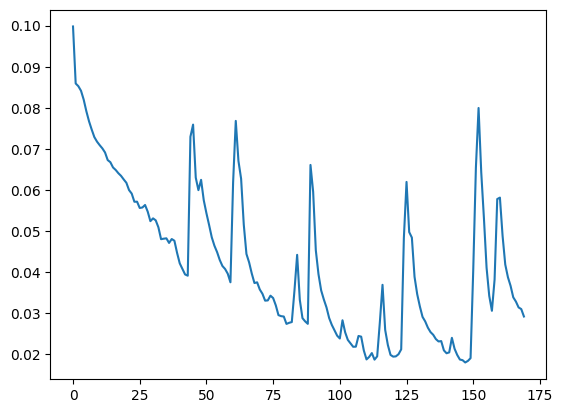

In [35]:
plt.plot(prev_losses)

In [ ]:
# 128 hid_size:
# {'trans_date': 0.8754189298509187, 'small_group': 0.8415347278400555,
#  'amount_rur': 0.8928016746359644}
# 256 hid_size:
# {'trans_date': 0.9114989021148735, 'small_group': 0.884017103894603,
#  'amount_rur': 0.7316151416055126}
# 512 hid_size:
# {'trans_date': 0.8563503987056512, 'small_group': 0.7989598983011672,
#  'amount_rur': 0.8633811972726222}
# 1300:
# {'trans_date': 0.924141916098463,  'small_group': 0.9248353172310182,
#  'amount_rur': 0.6159684502484687} lr = 0.001 45 epochs
# 1800 max hid size that fits to memory

In [ ]:
vocab.keys()

In [ ]:
plt.plot(plot_losses)

In [ ]:
# {'mcc': 0.44697508896797156,
#  'channel_type': 0.6462633451957296,
#  'currency': 0.6410777834265379,
#  'trx_category': 0.5930350788002033,
#  'amount': 15.625648393810371}
# mcc 363
# channel_type 7
# currency 66
# trx_category 11

# where model:
# /content/drive/MyDrive/ae_baseline_model/best_model_gru.p

# Inference and embedding validation

## inference + saving embeddings

In [ ]:
# model_path = '/content/drive/MyDrive/ae_baseline_model/best_model_gru.p'
# embeddings_path = "/content/drive/MyDrive/ae_data/ae_rosbank_gru.csv"

# model.load_state_dict(torch.load(model_path, map_location=device))
# model.eval()

all_df = pd.concat([train_df, test_df]).set_index('cl_id')
all_df.index = all_df.index.astype(np.int64)

# embs_of_seqs = []
# target_labels = []
# for i in tqdm.tqdm(range(all_df.shape[0])):
# # for i in tqdm.tqdm(range(100)):
#   input_tensor = torch.zeros(1, all_df.iloc[i]['mcc'].shape[0], len(all_feats))
#   for j, feat in enumerate(all_feats):
#     input_tensor[:, :, j] = torch.tensor(all_df.iloc[i][feat])

#   model.eval()

#   with torch.no_grad():
#     try:
#       _, hidden = model.enc(input_tensor.to(device))
#     except:
#       for j, feat in enumerate(cat_feats):
#         # print(max(vocab[feat]), all_df.iloc[i][feat].max(), feat)
#         replace_to_pad = np.vectorize(lambda x: x if x <= max(vocab[feat]) else 0 )
#         input_tensor[:, :, j] = torch.tensor(replace_to_pad(all_df.iloc[i][feat]))
#       _, hidden = model.enc(input_tensor.to(device))

#   hidden = hidden.reshape(-1).detach().cpu().numpy()

#   target_labels.append(all_df.iloc[i]['target_flag'])
#   embs_of_seqs.append(hidden)

# df_of_embs = pd.DataFrame(embs_of_seqs)

# df_of_embs = df_of_embs.set_index(all_df['cl_id'])
# df_of_embs['target_flag'] = target_labels

# df_of_embs.to_csv(embeddings_path)

## emb validation

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn.linear_model import LogisticRegression
import random

In [ ]:
SEED = 21
np.random.seed(21)
random.seed(21)

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ae_data/ae_rosbank_gru.csv", index_col='cl_id')
test_ids = pd.read_csv("/content/drive/MyDrive/ptls-experiments/scenario_rosbank/data/test_ids.csv")
TARGET_COLS = ['target_flag' , 'has_rare_mcc', 'has_rare_currency']

In [ ]:
def count_uniques(raw):
    out = dict()
    for feature in raw:
        out[feature] = out.get(feature, 0) + 1
    return float(len(out) > 1)

# all_df['has_rare_currency'] = all_df['currency'].apply(count_uniques)
all_df['currency'].apply(count_uniques).sum(), train_df['currency'].apply(count_uniques).sum(), test_df['currency'].apply(count_uniques).sum()

In [ ]:
def count_uniques(raw):
    out = dict()
    for feature in raw:
        out[feature] = out.get(feature, 0) + 1
    return out

trx_mcc_dict = dict()
trx_mcc_list = []
for raw in train_df.mcc:
    for feature in count_uniques(raw):
        trx_mcc_dict[feature] = trx_mcc_dict.get(feature, 0) + 1
for key, value in sorted(trx_mcc_dict.items(), key=lambda x: x[1]):
    trx_mcc_list.append((key, value))

rare_values = [key for key, value in trx_mcc_list[:218]]

def check_rares(raw):
    for rare_val in rare_values:
        if rare_val in raw:
            return 1.0
    return 0.0

all_df['mcc'].apply(check_rares).sum(), train_df['mcc'].apply(check_rares).sum(), all_df.shape, train_df.shape

In [ ]:
# all_df['has_rare_mcc'] = all_df['mcc'].apply(check_rares)
df = df.merge(all_df['has_rare_currency'], on='cl_id')

In [ ]:
TARGET_COLUMN = 'has_rare_currency'
TARGET_COLS = [col for col in df.columns if col in TARGET_COLS]

df_train = df[df.index.isin(test_ids.cl_id) == False]
df_train, targets_train = df_train.drop(TARGET_COLS, axis=1), df_train[TARGET_COLUMN]

df_test = df[df.index.isin(test_ids.cl_id)]
df_test, targets_test = df_test.drop(TARGET_COLS, axis=1), df_test[TARGET_COLUMN]

In [ ]:
kf = StratifiedKFold(n_splits=5, shuffle=True)
indexes = np.arange(len(targets_train))

arr_acc_test = []
arr_auc_test = []
arr_acc_val = []
arr_auc_val = []

clf = pipe = make_pipeline(
        MaxAbsScaler(),
        LogisticRegression(
            random_state=21,
            max_iter=1000000,
            multi_class='ovr'
        )
    )

In [ ]:
for train, val in kf.split(indexes, targets_train):
    X_train, X_val, y_train, y_val =  df_train.iloc[train], df_train.iloc[val], targets_train.iloc[train], targets_train.iloc[val]
    clf.fit(X_train, y_train)

    acc_test = clf.score(df_test, targets_test)
    acc_val = clf.score(X_val, y_val)

    pred_label_test = clf.predict_proba(df_test)[:, 1]
    pred_label_val = clf.predict_proba(X_val)[:, 1]

    auc_test = roc_auc_score(targets_test, pred_label_test, average='macro', multi_class='ovr')
    auc_val = roc_auc_score(y_val, pred_label_val, average='macro', multi_class='ovr')

    arr_acc_test.append(acc_test)
    arr_auc_test.append(auc_test)
    arr_acc_val.append(acc_val)
    arr_auc_val.append(auc_val)

arr_acc_test = np.array(arr_acc_test)
arr_auc_test = np.array(arr_auc_test)
arr_acc_val = np.array(arr_acc_val)
arr_auc_val = np.array(arr_auc_val)

# df_train, df_test, targets_train, targets_test
clf.fit(df_train, targets_train)
acc = clf.score(df_test, targets_test)
pred_label = clf.predict_proba(df_test)
pred_label = pred_label[:, 1]

roc_auc = roc_auc_score(targets_test, pred_label, average='macro', multi_class='ovr')

print('Val:  acc_mean: {0}, auc_mean: {1}, acc: {2}, auc: {3}'.\
          format(arr_acc_val.mean(), arr_auc_val.mean(), arr_acc_val, arr_auc_val))
print('Test: acc_mean: {0}, auc_mean: {1}, acc: {2}, auc: {3}'.\
          format(arr_acc_test.mean(), arr_auc_test.mean(), arr_acc_test, arr_auc_test))
print('Full trained model: acc: {0}, auc: {1}'.format(acc, roc_auc))

# Looking for new tasks

In [ ]:
train_df = train_df[train_df['trx_count'] >= 25]

In [ ]:
train_df.head(2)

In [ ]:
def count_uniques(raw):
    out = dict()
    for feature in raw:
        out[feature] = out.get(feature, 0) + 1
    return len(out) > 1

In [ ]:
def calc_stats(raw):
    return raw.mean()

In [ ]:
train_df['channel_type'].apply(count_uniques)

In [ ]:
!pip install pyspark

In [ ]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
import pyspark
spark = SparkSession.builder \
  .master("local") \
  .appName("parquet_example") \
  .getOrCreate()
df = spark.read.parquet('drive/MyDrive/ptls-experiments/scenario_rosbank/data/train_trx.parquet', header = True)
df = df.filter('trx_count >= 25')
# df.repartition(120).write.mode('overwrite').parquet('data/train_trx.parquet')

In [ ]:
def count_uniques(raw):
    out = dict()
    for feature in raw:
        out[feature] = out.get(feature, 0) + 1
    return float(len(out) > 1)

In [ ]:
from pyspark.sql.functions import udf
from pyspark.sql.types import *

In [ ]:
udfValueToInt = udf(count_uniques, FloatType())

In [ ]:
df.withColumn("new_target", udfValueToInt('currency')).

# New tasks

## mcc

In [ ]:
def count_uniques(raw):
  out = dict()
  for feature in raw:
    out[feature] = out.get(feature, 0) + 1
  return out

trx_mcc_dict = dict()
trx_mcc_list = []
for raw in train_df.mcc:
  for feature in count_uniques(raw):
    trx_mcc_dict[feature] = trx_mcc_dict.get(feature, 0) + 1
for key, value in sorted(trx_mcc_dict.items(), key=lambda x: x[1]):
  trx_mcc_list.append((key, value))

rare_values = [key for key, value in trx_mcc_list[:218]]

def check_rares(raw):
  for rare_val in rare_values:
    if rare_val in raw:
      return True
  return False

test_df[test_df['mcc'].apply(check_rares)].shape, test_df.shape

## currency

In [ ]:
def count_uniques(raw):
  out = dict()
  for feature in raw:
    out[feature] = out.get(feature, 0) + 1
  return float(len(out) > 1)

test_df['currency'].apply(count_uniques).sum()

# Some work

In [ ]:
# def load_model(model, path_of_model):
  # model.load_state_dict(torch.load(path_of_model), map_location=torch.device('cpu'))

In [ ]:
# def evaluate(dataloader, model, cat_metric, num_metric):
#     model.eval()

#     metrics = dict(zip(model.all_feats, [0 for i in range(len(model.all_feats))]))

#     count_of_samples = 0

#     with torch.no_grad():
#         for i, vdata in enumerate(dataloader):
#             vdata, minim = dict2tensor(vdata, model.all_feats)
#             vdata = vdata.to(device)
#             predicted, logits = model(vdata, minim, teacher_forcing_ratio=0.0)
#             count_of_samples += vdata.shape[0] * vdata.shape[1]
#             for i, feat in enumerate(model.all_feats):
#                 if feat in model.cat_feats:
#                     metrics[feat] += (predicted[:, :, i] == vdata[:, :minim, i]).sum().type(torch.float)
#                 else:
#                     # metrics[feat] += num_metric(real[:, :, i], predicted[:, :, i])
#                     metrics[feat] += ((predicted[:, :, i] - vdata[:, :minim, i])**2).sum().type(torch.float)

#     for feat, metric_value in metrics.items():
#       metrics[feat]

#     # print(vdata.shape[0],vdata.shape[1], vdata.shape)

#     return metrics

In [ ]:
# input_size = 0
# cat_features = []
# numeric_feats = []
# for key, value in trx_encoder_params.items():
#     if key == 'numeric_values':
#       input_size += len(value)
#       for feature in value:
#         numeric_feats.append(feature)

#     elif key == 'embeddings':
#       for feature, shapes in value.items():
#         input_size += shapes['out']
#         cat_features.append(feature)

# input_size, cat_features, numeric_feats

In [ ]:
# gru = nn.GRU(37, 32, batch_first=True)    # --> (all_h,  last_h)
# lstm = nn.LSTM(37, 32, batch_first=True)  # --> (all_h, (last_h, last_c)

In [ ]:
# transforming features from dict to torch tensor

# input_features = []
# for feat in all_feats:
#   input_features.append(torch.cat(tuple(a[0].payload[feat])).reshape(1,-1))

# input_features = torch.cat(input_features).permute(-1, 0).reshape(*a[0].seq_feature_shape, len(all_feats))

# emb_dim = 8
# out = None
# for i, feat in enumerate(all_feats):
#   raw = input_features[:,:, i]
#   if feat in cat_feats:
#     raw = raw.type(torch.long).apply_(lambda x: vocab[feat].index(x))
#     emb_layer = nn.Embedding(len(vocab[feat]), emb_dim)
#     raw = emb_layer(raw)
#   else:
#     raw = raw[:, :, None]
#   if out is not None:
#     print(raw.shape, out.shape)
#     out = torch.cat([out, raw], dim=2)
#   else:
#     out = raw

In [ ]:
# mcc_predict = heads['mcc'](new_h_for_ts)

# new_input = None

# for i, feat in enumerate(all_feats):
#     if feat in cat_feats:
#         predict = heads[feat](new_h_for_ts_unit).max(dim=2).indices[:, :, None]
#         real = F.one_hot(inp[:, 0, i].type(torch.long), len(vocab[feat]))[:, None, :]


#     else:
#         predict = heads[feat](new_h_for_ts_unit)
#     print(predict.shape)

#     if new_input is None:
#         new_input = predict.type(torch.float)
#     else:
#         new_input = torch.cat([new_input, predict], dim=2)

In [ ]:
# heads = {}
# for key, value in vocab.items():
#   vocab_size = len(value)
#   heads[key] = nn.Linear(32, vocab_size)

# for feat in num_feats:
#   heads[feat] = nn.Linear(32, 1)

# inference

In [ ]:
model.load_state_dict(torch.load('/content/drive/MyDrive/ae_baseline_model/best_model_gru.p', map_location=device))
model.eval()

all_df = pd.concat([train_df, test_df])

embs_of_seqs = []
target_labels = []
for i in tqdm.tqdm(range(all_df.shape[0])):
# for i in tqdm.tqdm(range(100)):
  input_tensor = torch.zeros(1, all_df.iloc[i]['mcc'].shape[0], len(all_feats))
  for j, feat in enumerate(all_feats):
    input_tensor[:, :, j] = torch.tensor(all_df.iloc[i][feat])

  model.eval()

  with torch.no_grad():
    try:
      _, hidden = model.enc(input_tensor.to(device))
    except:
      for j, feat in enumerate(cat_feats):
        # print(max(vocab[feat]), all_df.iloc[i][feat].max(), feat)
        replace_to_pad = np.vectorize(lambda x: x if x <= max(vocab[feat]) else 0 )
        input_tensor[:, :, j] = torch.tensor(replace_to_pad(all_df.iloc[i][feat]))
      _, hidden = model.enc(input_tensor.to(device))

  hidden = hidden.reshape(-1).detach().cpu().numpy()

  target_labels.append(all_df.iloc[i]['target_flag'])
  embs_of_seqs.append(hidden)

df_of_embs = pd.DataFrame(embs_of_seqs)

df_of_embs = df_of_embs.set_index(all_df['cl_id'])
df_of_embs['target_flag'] = target_labels

In [ ]:
df_of_embs.to_csv("/content/drive/MyDrive/ae_data/ae_rosbank_gru.csv")

In [ ]:
# check = pd.read_csv("/content/drive/MyDrive/ae_data/ae_rosbank_best_model_tanh.csv")